In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datadir=r"/content/drive/MyDrive/PlantVillageMain/train"
test_datadir=r"/content/drive/MyDrive/PlantVillageMain/test"
val_datadir=r"/content/drive/MyDrive/PlantVillageMain/val"

In [ ]:
CATEGORIES = ["Potato___Early_blight","Potato___healthy","Potato___Late_blight"]

In [ ]:
IMG_SIZE=(256,256)

In [ ]:
train=[]
test=[]
val=[]

In [ ]:
def create_train_data():
    for category in CATEGORIES:
        path=os.path.join(train_datadir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,IMG_SIZE)
            train.append([new_array,class_num])

In [ ]:
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(test_datadir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,IMG_SIZE)
            test.append([new_array,class_num])

In [ ]:
def create_val_data():
    for category in CATEGORIES:
        path=os.path.join(val_datadir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,IMG_SIZE)
            val.append([new_array,class_num])

In [ ]:
create_train_data()
create_test_data()
create_val_data()

In [ ]:
random.shuffle(train)
random.shuffle(test)
random.shuffle(val)

In [ ]:
X_train=[]
y_train=[]

X_test=[]
y_test=[]

X_val=[]
y_val=[]

In [ ]:
for features,label in train:
    X_train.append(features)
    y_train.append(label)

for features,label in test:
    X_test.append(features)
    y_test.append(label)

for features,label in val:
    X_val.append(features)
    y_val.append(label)

In [ ]:
X_train=np.array(X_train).reshape(-1,IMG_SIZE[0],IMG_SIZE[1],3)
X_test=np.array(X_test).reshape(-1,IMG_SIZE[0],IMG_SIZE[1],3)
X_val=np.array(X_val).reshape(-1,IMG_SIZE[0],IMG_SIZE[1],3)

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

In [ ]:
X_test.shape

(216, 256, 256, 3)

In [ ]:
X_val.shape

(430, 256, 256, 3)

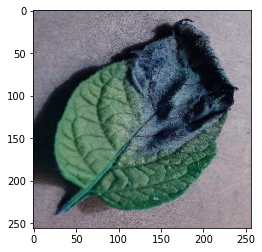

In [ ]:
plt.imshow(X_train[0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import models,layers,Sequential

In [ ]:
cnn=Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256,3)),
    layers.Normalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Normalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.Normalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(200, activation='softmax')         
])

cnn.build(input_shape=(-1,IMG_SIZE[0],IMG_SIZE[1],3))

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=25)

Epoch 1/25
48/48 [==============================] - 12s 170ms/step - loss: 4.9945 - accuracy: 0.4429
Epoch 2/25
48/48 [==============================] - 8s 164ms/step - loss: 1.0838 - accuracy: 0.5438
Epoch 3/25
48/48 [==============================] - 8s 164ms/step - loss: 0.7387 - accuracy: 0.7085
Epoch 4/25
48/48 [==============================] - 8s 164ms/step - loss: 0.5418 - accuracy: 0.7895
Epoch 5/25
48/48 [==============================] - 8s 164ms/step - loss: 0.4221 - accuracy: 0.8373
Epoch 6/25
48/48 [==============================] - 8s 165ms/step - loss: 0.3553 - accuracy: 0.8672
Epoch 7/25
48/48 [==============================] - 8s 165ms/step - loss: 0.3481 - accuracy: 0.8758
Epoch 8/25
48/48 [==============================] - 8s 166ms/step - loss: 0.2707 - accuracy: 0.8871
Epoch 9/25
48/48 [==============================] - 8s 165ms/step - loss: 0.2235 - accuracy: 0.9170
Epoch 10/25
48/48 [==============================] - 8s 166ms/step - loss: 0.2710 - accuracy: 0.896

In [ ]:
cnn.evaluate(X_val,y_val)

14/14 [==============================] - 1s 89ms/step - loss: 0.3229 - accuracy: 0.8953


[0.3229122459888458, 0.895348846912384]

# Test

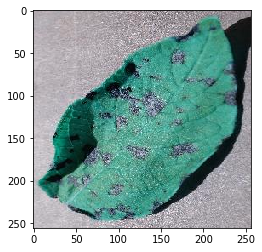

In [ ]:
plt.imshow(X_test[0])

In [ ]:
X_test[0].reshape((-1,256,256,3)).shape

(1, 256, 256, 3)

In [ ]:
test_pred_0=cnn.predict(X_test[0].reshape((-1,256,256,3)))

In [ ]:
np.argmax(test_pred_0)

0

In [ ]:
y_test[0]

0

In [ ]:
CATEGORIES[y_test[0]]

'Potato___Early_blight'

In [ ]:
CATEGORIES[np.argmax(test_pred_0)]

'Potato___Early_blight'

In [ ]:
np.max(test_pred_0)*100

99.97344613075256

# Prediction

In [ ]:
y_pred=[]
y_pred_acc=[]

In [ ]:
pred=cnn.predict(X_test)

In [ ]:
for item in pred:
    y_pred.append(np.argmax(item))
    y_pred_acc.append(np.max(item))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.67      1.00      0.80        16
           2       0.99      0.86      0.92       100

    accuracy                           0.93       216
   macro avg       0.87      0.95      0.90       216
weighted avg       0.94      0.93      0.93       216



# Display Prediction Results

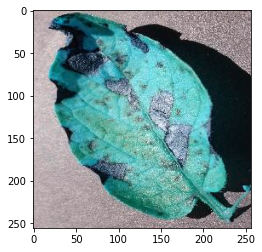

In [ ]:
for i in range(0,5):
    plt.imshow(X_test[i])

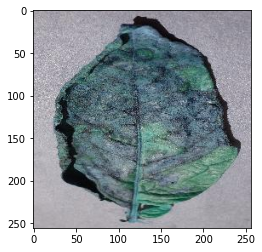

In [ ]:
plt.imshow(X_test[4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


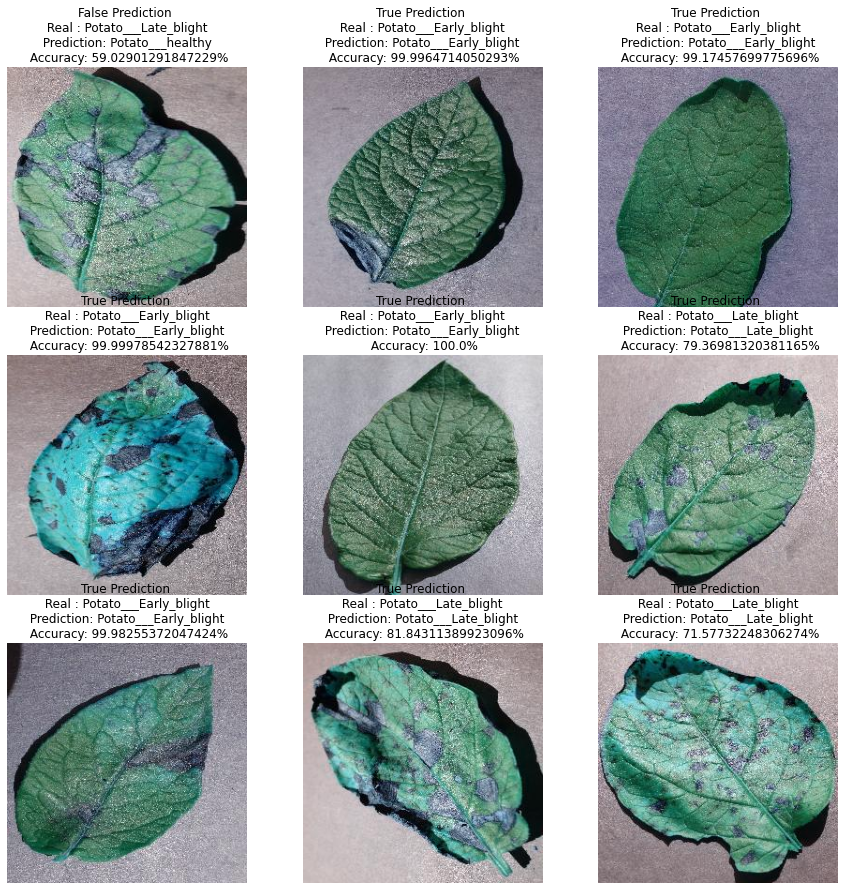

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test:
    for i in range(9):

        if CATEGORIES[test[i][1]] == CATEGORIES[np.max(y_pred[i])] :
          ans = 'True Prediction'
        else:
          ans='False Prediction'
        
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X_test[i+9])

        plt.title(f"{ans} \n Real : {CATEGORIES[test[i][1]]} \n Prediction: {CATEGORIES[np.max(y_pred[i])]} \n Accuracy: {y_pred_acc[i] * 100}%")
        plt.axis('off')

In [ ]:
CATEGORIES

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

(-0.5, 255.5, 255.5, -0.5)

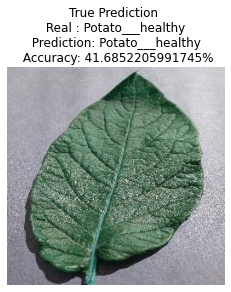

In [ ]:
plt.figure()
plt.imshow(X_test[13])
plt.title(f"{ans} \n Real : {CATEGORIES[test[13][1]]} \n Prediction: {CATEGORIES[np.max(y_pred[13])]} \n Accuracy: {y_pred_acc[13] * 100}%")
plt.axis('off')

In [ ]:
#plt.imshow(images[i].numpy().astype("uint8"))
        
        #predicted_class, confidence = predict(model, images[i].numpy())
        #actual_class = class_names[labels[i]] 
        
        #plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        #plt.axis("off")